___
# Ciência dos Dados - PROJETO 1

## Vitor Satyro Vitturi
___

___
## Introdução
A partir da analise é possivel observar como a população utiliza a internet, via celular ou via microcomputador. Dentre estes, quais seria mais efetivo para marketing de uma empresa.


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\vitor\Dropbox\Insper\2017.2\Ciencia de Dados\Projeto1\CienciaDados


In [3]:
#Se usar o arquivo descompactado
#Configurar as colunas que usarei
dados_2015 = pd.read_csv('DOM2015.csv',sep=',')

dados_2015 = pd.DataFrame(dados_2015)

dados15 = dados_2015.loc[:,['UF','V4621','V02322','V02323','V02324','V02424',]]


dados15.head()

,UF,V4621,V02322,V02323,V02324,V02424
0,11,800.0,4.0,NaN,NaN,NaN
1,11,NaN,NaN,NaN,NaN,NaN
2,11,1150.0,2.0,2.0,4.0,2.0
3,11,793.0,2.0,2.0,2.0,2.0
4,11,2900.0,4.0,NaN,NaN,NaN


In [4]:
#Tirar NaN
dados15 = dados15.loc[(dados15.V4621 >= 0) & (dados15.V4621 != 999999999999)]
dados15 = dados15[pd.notnull(dados15.V4621) &\
                  pd.notnull(dados15.V02322) &\
                  pd.notnull(dados15.V02323) &\
                  pd.notnull(dados15.V02324) &\
                  pd.notnull(dados15.V02424)]


In [5]:
#Analisando só SP
dados15_SP = dados15[dados15.UF == 35]

In [6]:
dados15.UF = dados15.UF.astype('category')
dados15.UF = dados15.UF.astype('category')
dados15.V4621 = dados15.V4621.astype('int')
dados15.V02322 = dados15.V02322.astype('category')
dados15.V02323 = dados15.V02323.astype('category')
dados15.V02324 = dados15.V02324.astype('category')
dados15.V02424 = dados15.V02424.astype('category')

dados15.UF.cat.categories = {'Rondônia','Acre','Amazonas','Roraima',\
                             'Pará','Amapá','Tocantins','Maranhão',\
                             'Piauí','Ceará','Rio Grande do Norte',\
                             'Paraíba','Pernambuco','Alagoas','Sergipe',\
                             'Bahia','Minas Gerais','Espírito Santo',\
                             'Rio de Janeiro','São Paulo','Paraná',\
                             'Santa Catarina','Rio Grande do Sul',\
                             'Mato Grosso do Sul','Mato Grosso','Goiás',\
                             'Distrito Federal'}
dados15.V02322.cat.categories = {'Sim'}
dados15.V02323.cat.categories = {'Sim','Não'}
dados15.V02324.cat.categories = {'Sim','Não'}
dados15.V02424.cat.categories = {'Sim','Não'}

In [ ]:
alta = 3000
media = 1500
baixa = 500

dados15.loc[dados15["Renda Salarial(R$)"] < baixa, "classe"] = "baixa"
dados15.loc[dados15["Renda Salarial(R$)"] > baixa, "classe"] = "média baixa"

In [7]:
dados15 = dados15.rename(columns = {"V4621":"Renda Salarial(R$)","V02322":"Acesso a internet em Domicílio", "V02323":"Acesso a internet em Microcomputador", "V02324":"Acesso a internet em Celular","V02424":"Acesso a internet em 3G 4G"})
renda_15 = dados15["Renda Salarial(R$)"]

In [8]:
import math as m
raiz = m.sqrt(len(renda_15))
raiz = int(raiz)

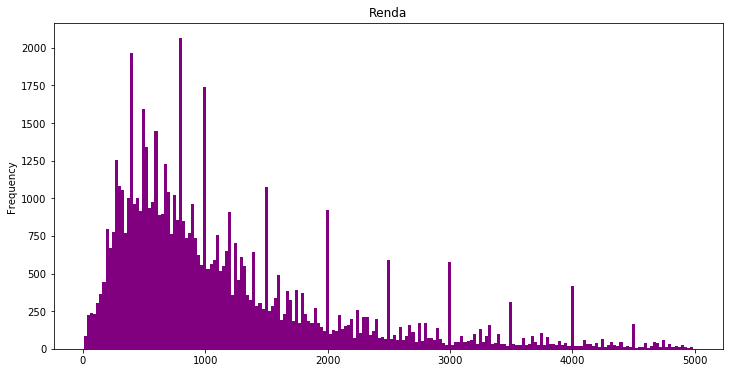

In [17]:
ganham_menos = renda_15[renda_15 < 50000]
ganham_menos.plot(kind='hist', bins = range(10,5000,25), figsize=(12,6), color=("Purple"))
plt.title('Renda')

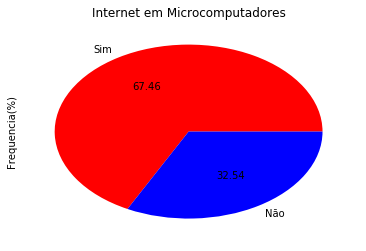

In [10]:
micro = dados15["Acesso a internet em Microcomputador"].value_counts(True)*100
micro.plot(kind='pie', autopct="%.2f", colors=('red','blue'))
plt.title("Internet em Microcomputadores")
plt.ylabel('Frequencia(%)')


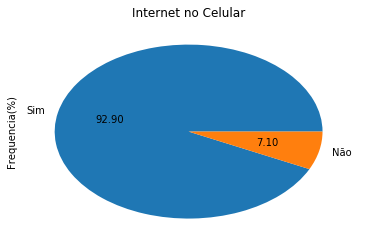

In [11]:
celular = dados15["Acesso a internet em Celular"].value_counts(True)*100
celular.plot(kind='pie', autopct="%.2f",legend=False)
plt.title("Internet no Celular")
plt.ylabel("Frequencia(%)")

In [15]:
 #Renda menor que 30000 dividida em 3 partes comparada com uso de internet via celular


C:\Users\vitor\Anaconda3\lib\site-packages\pandas\core\indexes\category.py:138: RuntimeWarning: Values and categories have different dtypes. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  data = Categorical(data, categories=categories, ordered=ordered)
C:\Users\vitor\Anaconda3\lib\site-packages\pandas\core\indexes\category.py:138: RuntimeWarning: None of the categories were found in values. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  data = Categorical(data, categories=categories, ordered=ordered)
C:\Users\vitor\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


""


In [ ]:
#Renda menor que 30000 dividida em 3 partes comparada com uso de internet via microcomputador

In [ ]:
dados15.to_csv('dados_2015_filtrado.csv')
#dados15_SP.to_csv('dados_2015_filtrado_SP.csv')

___
## Conclusão 

Descreva aqui suas conclusões!